Import Libraries


In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier


from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

Load dataset

In [48]:
df = pd.read_csv('/content/Iris.csv' )

In [49]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


Pre processing

In [50]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [52]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

df.drop(['Id'], axis=1, inplace=True)

In [53]:
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [54]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [55]:
df.dtypes

,0
Id,int64
SepalLengthCm,float64
SepalWidthCm,float64
PetalLengthCm,float64
PetalWidthCm,float64
Species,object


In [56]:
df.isna().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


Deal with duplicates values

In [57]:
df.duplicated().sum()

np.int64(0)

In [58]:
df.drop_duplicates(inplace=True)

Learning from dataset

In [59]:
df['Species'].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


<ipython-input-60-3e67a67ddabb>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Species', data=df, palette='Set2')


<Axes: xlabel='Species', ylabel='count'>

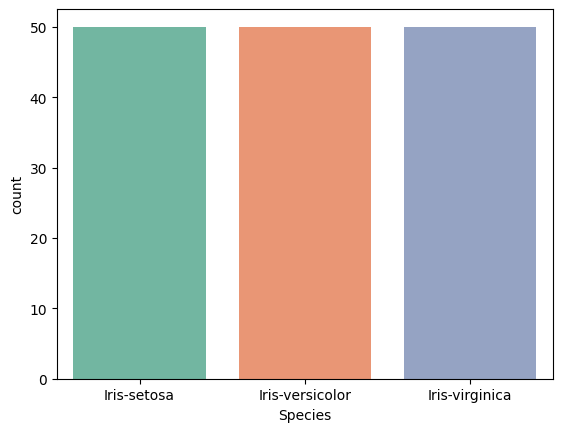

In [60]:
sns.countplot(x='Species', data=df, palette='Set2')

Species vs SepalLengthCm

In [61]:
 df.groupby(["Species"], as_index=False)["SepalLengthCm"].mean()

,Species,SepalLengthCm
0,Iris-setosa,5.006
1,Iris-versicolor,5.936
2,Iris-virginica,6.588


<ipython-input-62-d0d4c9fa236b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Species", y="SepalLengthCm", data=df, palette=colors)


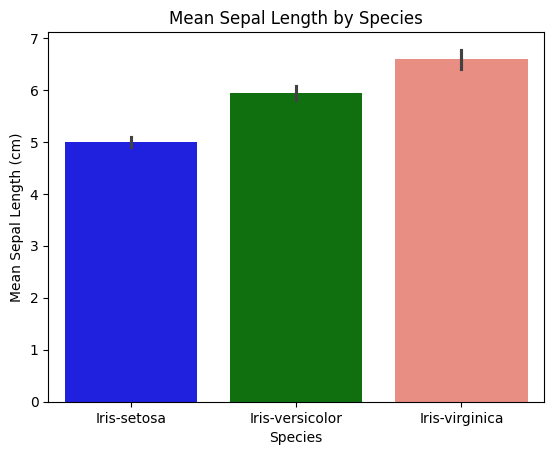

In [62]:
# Define custom colors
colors = ["blue", "green", "salmon"]
# Plot using seaborn
sns.barplot(x="Species", y="SepalLengthCm", data=df, palette=colors)

# Add labels and title
plt.xlabel("Species")
plt.ylabel("Mean Sepal Length (cm)")
plt.title("Mean Sepal Length by Species")

# Show the plot
plt.show()


<ipython-input-63-f8688a474a8c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Species", y="SepalLengthCm", palette=colors)


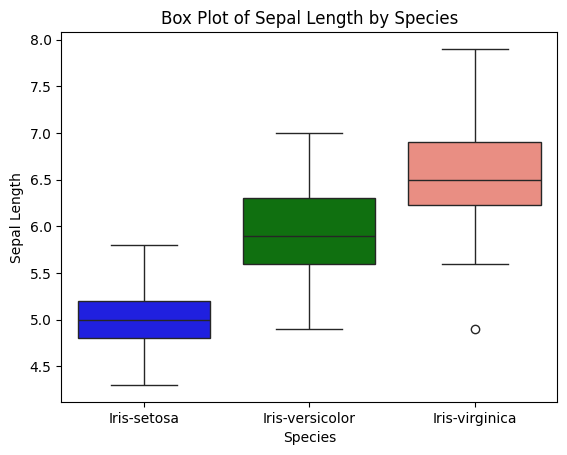

In [63]:
sns.boxplot(data=df, x="Species", y="SepalLengthCm", palette=colors)

# Add title and labels
plt.title("Box Plot of Sepal Length by Species")
plt.xlabel("Species")
plt.ylabel("Sepal Length")

# Show plot
plt.show()

In [64]:
df.groupby(["Species"], as_index=False)["SepalWidthCm"].mean()

,Species,SepalWidthCm
0,Iris-setosa,3.418
1,Iris-versicolor,2.770
2,Iris-virginica,2.974


<ipython-input-65-adffaf4589e8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Species", y="SepalWidthCm", data=df, palette=colors)


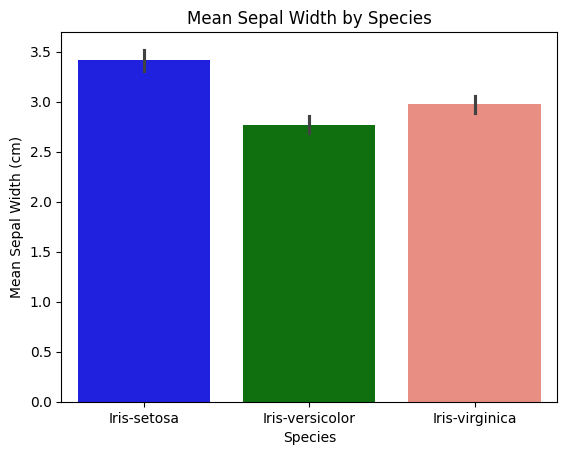

In [65]:
# Plot using seaborn
sns.barplot(x="Species", y="SepalWidthCm", data=df, palette=colors)

# Add labels and title
plt.xlabel("Species")
plt.ylabel("Mean Sepal Width (cm)")
plt.title("Mean Sepal Width by Species")

# Show the plot
plt.show()

<ipython-input-66-b285dee21072>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Species", y="SepalWidthCm", palette=colors)


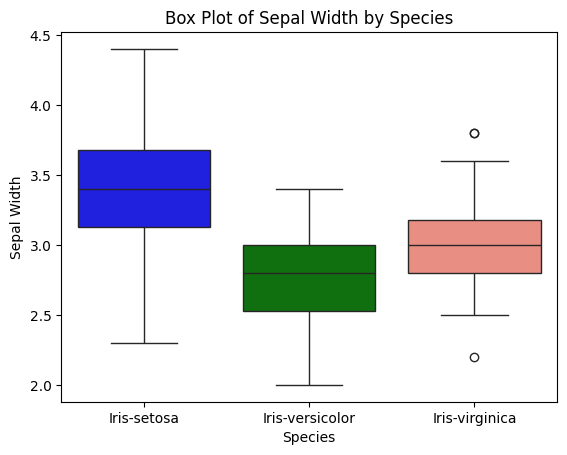

In [66]:
sns.boxplot(data=df, x="Species", y="SepalWidthCm", palette=colors)

# Add title and labels
plt.title("Box Plot of Sepal Width by Species")
plt.xlabel("Species")
plt.ylabel("Sepal Width")

# Show plot
plt.show()



Species vs PetalLengthCm

In [67]:

df.groupby(["Species"], as_index=False)["PetalLengthCm"].mean()

,Species,PetalLengthCm
0,Iris-setosa,1.464
1,Iris-versicolor,4.260
2,Iris-virginica,5.552


<ipython-input-68-deb16b3d2856>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Species", y="PetalLengthCm", data=df, palette=colors)


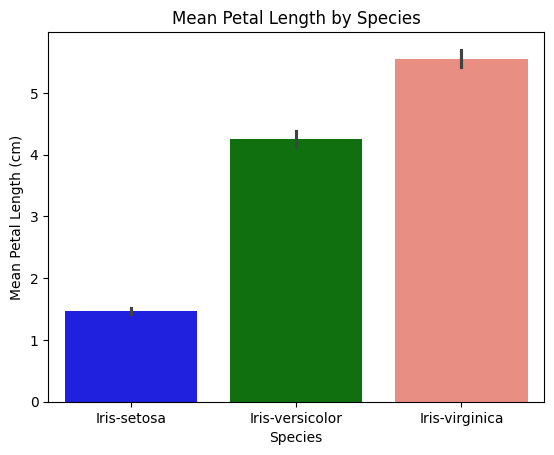

In [68]:
sns.barplot(x="Species", y="PetalLengthCm", data=df, palette=colors)

# Add labels and title
plt.xlabel("Species")
plt.ylabel("Mean Petal Length (cm)")
plt.title("Mean Petal Length by Species")

# Show the plot
plt.show()

<ipython-input-69-b7e772621d34>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Species", y="PetalLengthCm", palette=colors)


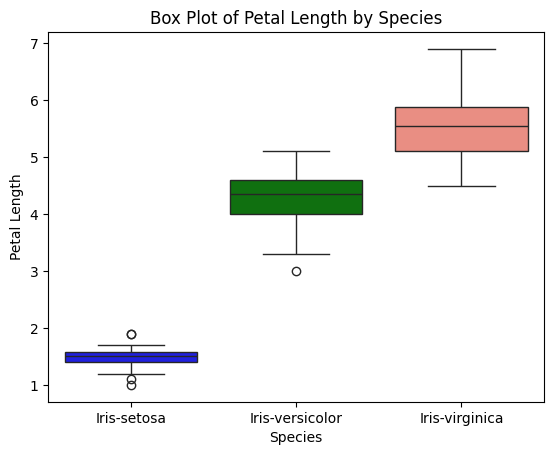

In [69]:
sns.boxplot(data=df, x="Species", y="PetalLengthCm", palette=colors)

# Add title and labels
plt.title("Box Plot of Petal Length by Species")
plt.xlabel("Species")
plt.ylabel("Petal Length")

# Show plot
plt.show()


Species vs PetalWidthCm

In [70]:

df.groupby(["Species"], as_index=False)["PetalWidthCm"].mean()

,Species,PetalWidthCm
0,Iris-setosa,0.244
1,Iris-versicolor,1.326
2,Iris-virginica,2.026


<ipython-input-71-570a8ef6beb7>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Species', y='PetalWidthCm', data=df, palette=colors)


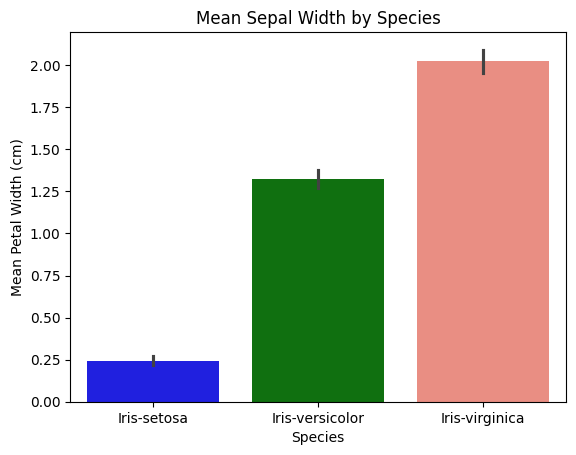

In [71]:
sns.barplot(x='Species', y='PetalWidthCm', data=df, palette=colors)

# Add labels and title
plt.xlabel("Species")
plt.ylabel("Mean Petal Width (cm)")
plt.title("Mean Sepal Width by Species")

# Show the plot
plt.show()

<ipython-input-72-09706c1b826b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Species", y="PetalWidthCm", palette=colors)


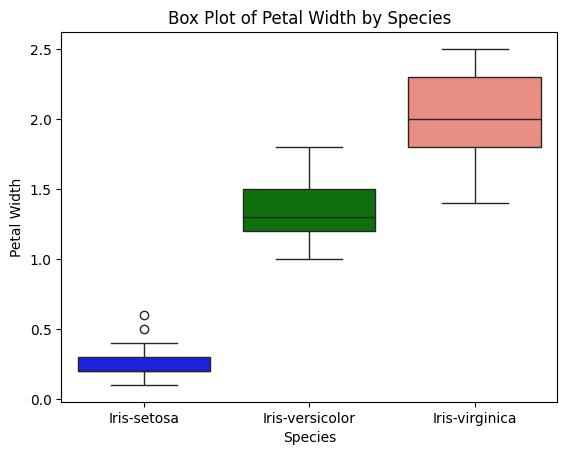

In [72]:
sns.boxplot(data=df, x="Species", y="PetalWidthCm", palette=colors)

# Add title and labels
plt.title("Box Plot of Petal Width by Species")
plt.xlabel("Species")
plt.ylabel("Petal Width")

# Show plot
plt.show()


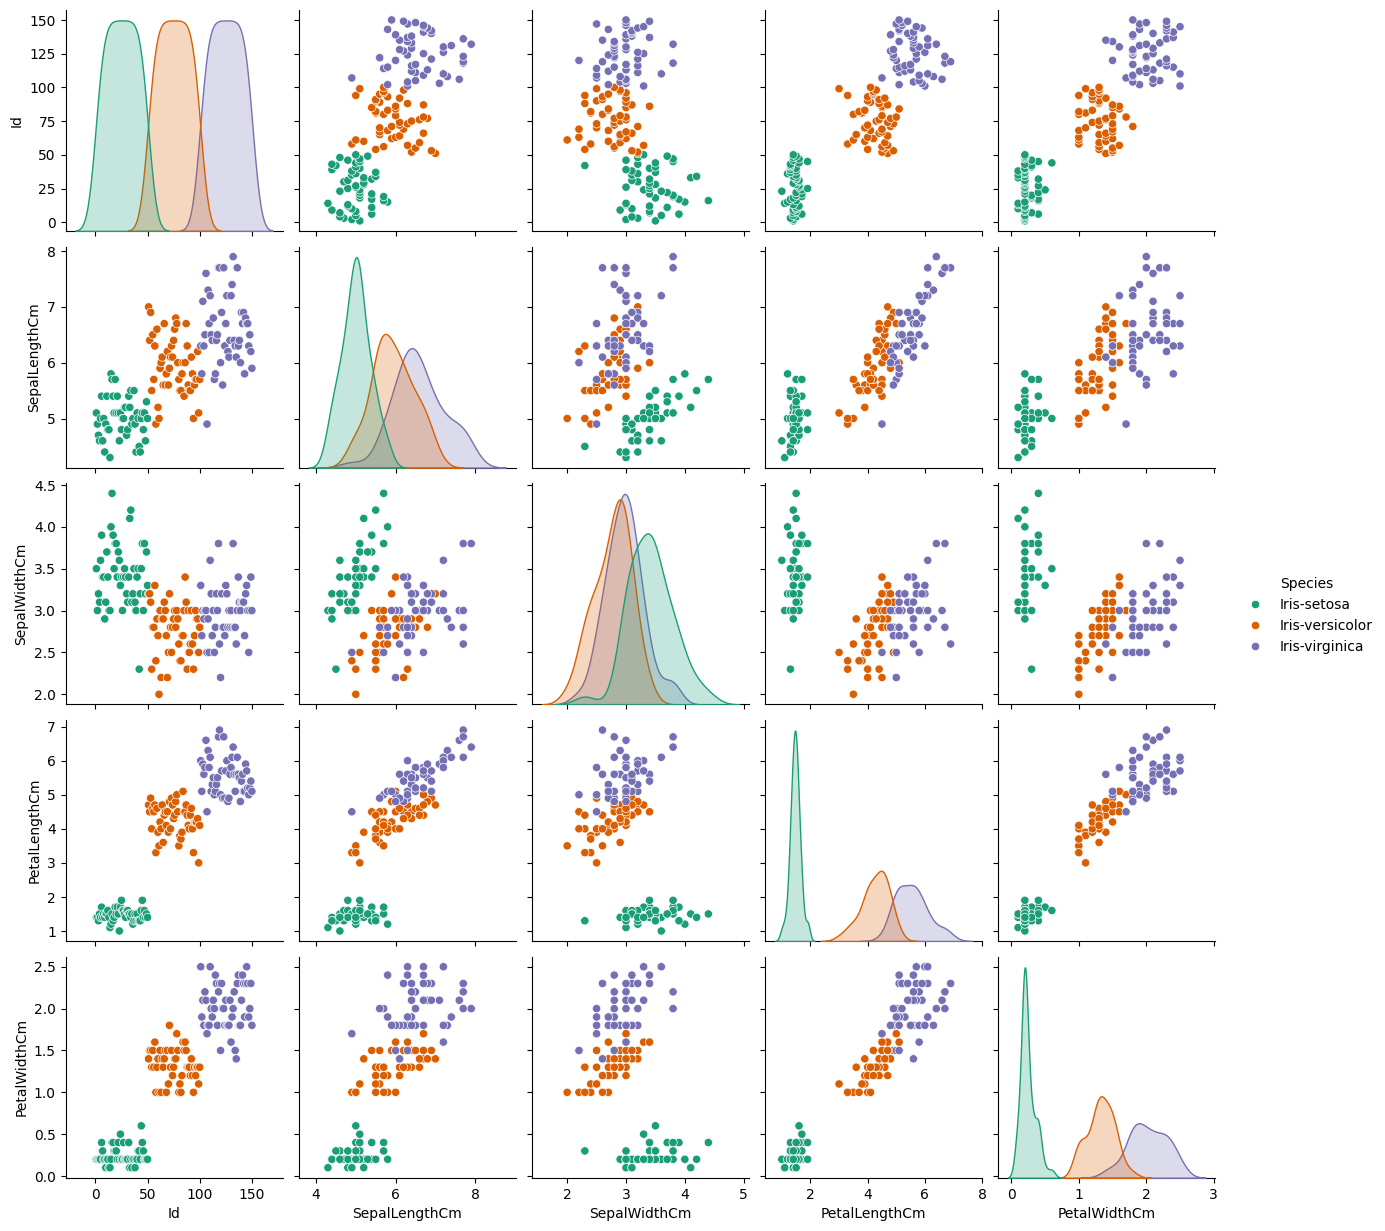

In [73]:
# Make Pair plot
sns.pairplot(df,hue= 'Species' , palette = 'Dark2', diag_kind = 'kde')
plt.show()

In [74]:
df1 = df.copy()

In [75]:
dfcorr=df.drop(['Species'], axis=1).corr()


In [76]:
dfcorr.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.917533,-0.995356,0.983845,0.989278
SepalLengthCm,0.917533,1.000000,-0.913635,0.967201,0.951831
SepalWidthCm,-0.995356,-0.913635,1.000000,-0.986193,-0.991033
PetalLengthCm,0.983845,0.967201,-0.986193,1.000000,0.997824
PetalWidthCm,0.989278,0.951831,-0.991033,0.997824,1.000000


<Axes: >

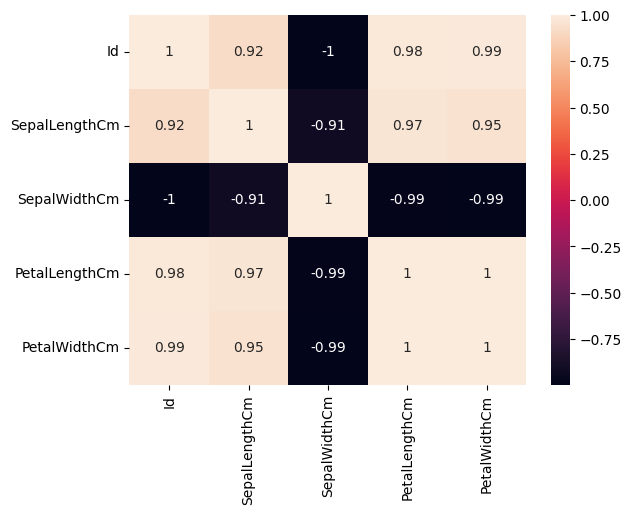

In [77]:
sns.heatmap(dfcorr.corr() , annot =True)

Split data into training and testing sets

In [78]:

# Splitting into features and target
x = df.drop(['Species'], axis=1)
y = df['Species']

# Splitting into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=32)
method_names = []
method_scores = []


LOGISTIC REGRESSION CLASSIFICATION

In [79]:

log_reg = LogisticRegression()
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train) #Fitting
print("Logistic Regression Classification Test Accuracy {}".format(log_reg.score(x_test,y_test)))
method_names.append("Logistic Reg.")
method_scores.append(log_reg.score(x_test,y_test))


Logistic Regression Classification Test Accuracy 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


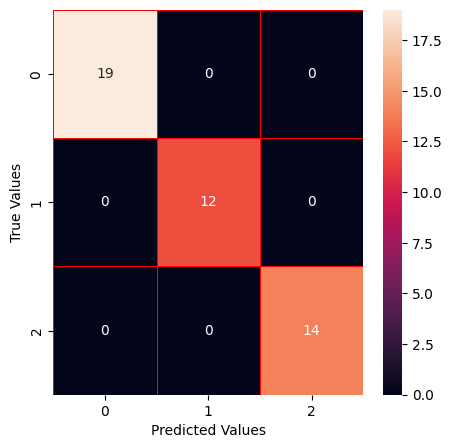

In [80]:
#Confusion Matrix
y_pred = log_reg.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

In [81]:
#Calculate MAE, MSE for LogisticRegression

# Encode the labels
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
y_pred_encoded = le.transform(y_pred)

# Calculate the metrics
mae = mean_absolute_error(y_test_encoded, y_pred_encoded)
mse = mean_squared_error(y_test_encoded, y_pred_encoded)

print("MAE:", mae)
print("MSE:", mse)

MAE: 0.0
MSE: 0.0


KNN (K-Nearest Neighbour) CLASSIFICATION


In [82]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train,y_train)
print("Score for Number of Neighbors = 6: {}".format(knn.score(x_test,y_test)))

Score for Number of Neighbors = 6: 1.0


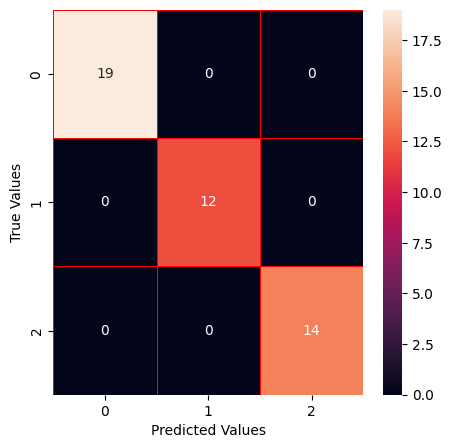

In [83]:
#Confusion Matrix
y_pred = knn.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

Text(0, 0.5, 'score')

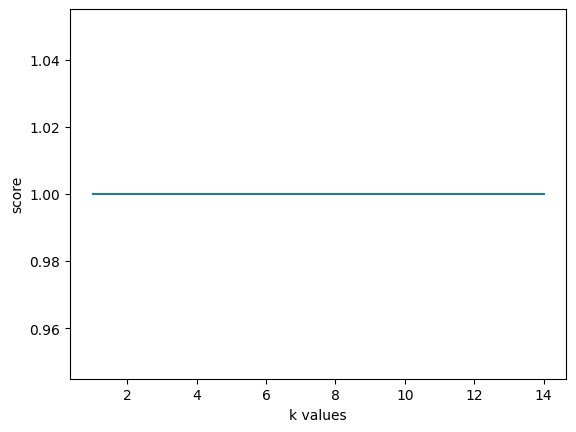

In [84]:
score_list=[]
for each in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors=each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))

plt.plot(range(1,15),score_list)
plt.xlabel("k values")
plt.ylabel("score")

Score for Number of Neighbors = 4: 1.0


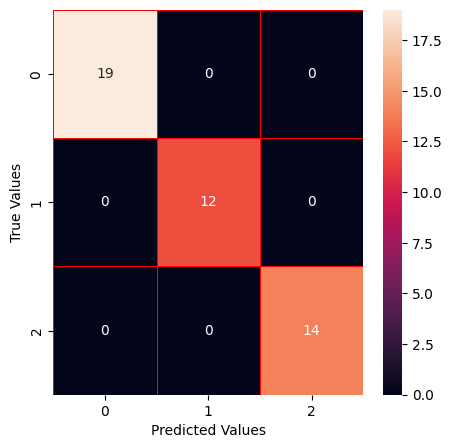

In [85]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)
print("Score for Number of Neighbors = 4: {}".format(knn.score(x_test,y_test)))
method_names.append("KNN")
method_scores.append(knn.score(x_test,y_test))

#Confusion Matrix
y_pred = knn.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()


In [86]:
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
y_pred_encoded = le.transform(y_pred)

# Calculate the metrics
mae = mean_absolute_error(y_test_encoded, y_pred_encoded)
mse = mean_squared_error(y_test_encoded, y_pred_encoded)

print("MAE:", mae)
print("MSE:", mse)

MAE: 0.0
MSE: 0.0


SUPPORT VECTOR MACHINE (SVM)

In [87]:

svm = SVC(kernel='linear',random_state=42)
svm.fit(x_train,y_train)
print("SVM Classification Score is: {}".format(svm.score(x_test,y_test)))
method_names.append("SVM")
method_scores.append(svm.score(x_test,y_test))

SVM Classification Score is: 1.0


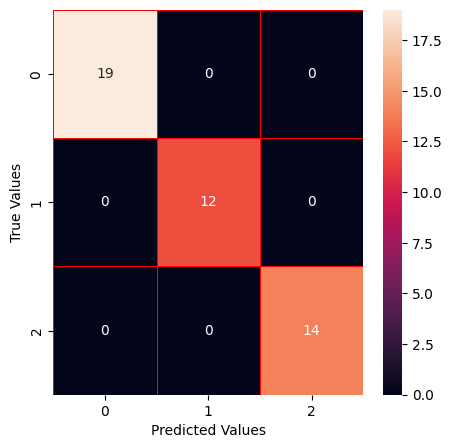

In [88]:
#Confusion Matrix
y_pred = svm.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

In [89]:
#Calculate MAE, MSE for LogisticRegression

# Encode the labels
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
y_pred_encoded = le.transform(y_pred)

# Calculate the metrics
mae = mean_absolute_error(y_test_encoded, y_pred_encoded)
mse = mean_squared_error(y_test_encoded, y_pred_encoded)

print("MAE:", mae)
print("MSE:", mse)

MAE: 0.0
MSE: 0.0


DECISION TREE CLASSIFICATION

In [90]:

dec_tree = DecisionTreeClassifier()
dec_tree.fit(x_train,y_train)
print("Decision Tree Classification Score: ",dec_tree.score(x_test,y_test))
method_names.append("Decision Tree")
method_scores.append(dec_tree.score(x_test,y_test))

Decision Tree Classification Score:  1.0


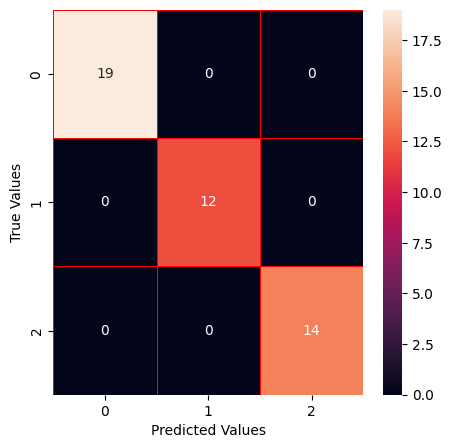

In [91]:
#Confusion Matrix
y_pred = dec_tree.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

In [92]:
#Calculate MAE, MSE for LogisticRegression

# Encode the labels
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
y_pred_encoded = le.transform(y_pred)

# Calculate the metrics
mae = mean_absolute_error(y_test_encoded, y_pred_encoded)
mse = mean_squared_error(y_test_encoded, y_pred_encoded)

print("MAE:", mae)
print("MSE:", mse)

MAE: 0.0
MSE: 0.0



RANDOM FOREST CLASSIFICATION

In [93]:

rand_forest = RandomForestClassifier(n_estimators=100, random_state=42)
rand_forest.fit(x_train,y_train)
print("Random Forest Classification Score: ",rand_forest.score(x_test,y_test))
method_names.append("Random Forest")
method_scores.append(rand_forest.score(x_test,y_test))

Random Forest Classification Score:  1.0


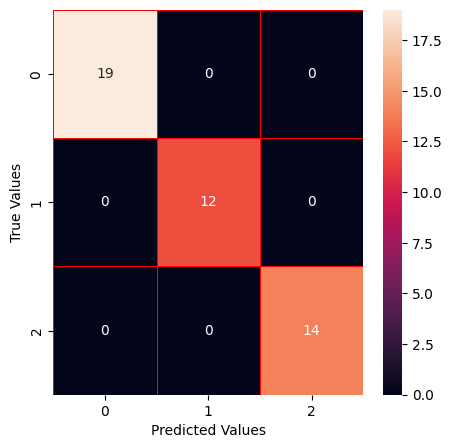

In [94]:
#Confusion Matrix
y_pred = rand_forest.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

CONCLUSION
Let's see differences between our methods scores!

Text(0, 0.5, 'Method Score')

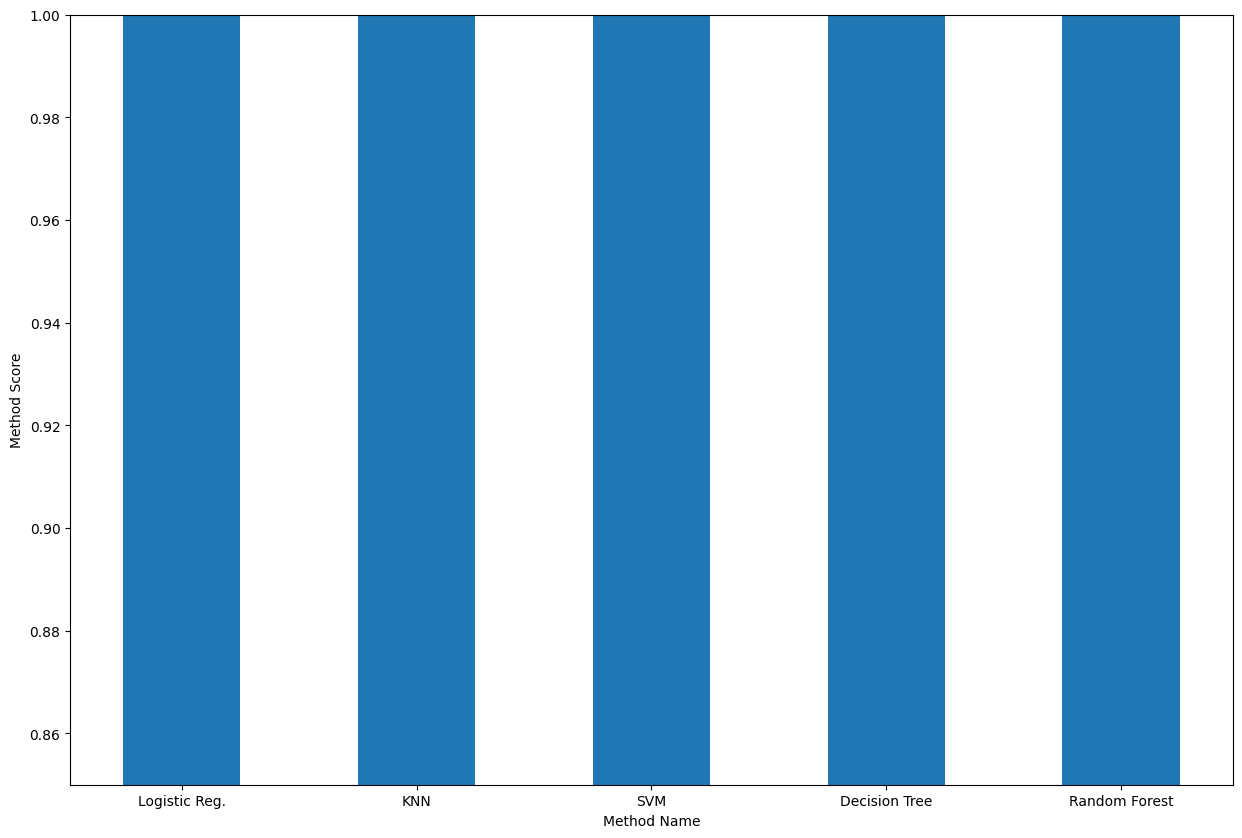

In [95]:


plt.figure(figsize=(15,10))
plt.ylim([0.85,1])
plt.bar(method_names,method_scores,width=0.5)
plt.xlabel('Method Name')
plt.ylabel('Method Score')

Predict for new data
Additional

In [99]:

def predict_species(sepal_length, sepal_width, petal_length, petal_width):
    return log_reg.predict([[sepal_length, sepal_width, petal_length, petal_width]])[0]


In [102]:
def predict_species(sepal_length, sepal_width, petal_length, petal_width, id_val=None):
    """
    Predicts the species of an Iris flower based on its sepal and petal measurements.

    Args:
        sepal_length (float): The length of the sepal in cm.
        sepal_width (float): The width of the sepal in cm.
        petal_length (float): The length of the petal in cm.
        petal_width (float): The width of the petal in cm.
        id_val (int, optional): The ID value of the flower. Defaults to None.

    Returns:
        str: The predicted species of the Iris flower.
    """
    # if id_val is not None:
    #   return log_reg.predict([[id_val, sepal_length, sepal_width, petal_length, petal_width]])[0]
    # else:
    # By removing `Id` feature the input shape would be 4 features, not 5 which you originally trained on.
    return log_reg.predict([[sepal_length, sepal_width, petal_length, petal_width]])[0] # this will be causing problem here as during training the shape was 5 not 4.

In [104]:
def predict_species(sepal_length, sepal_width, petal_length, petal_width, id_val=None):
    """
    Predicts the species of an Iris flower based on its sepal and petal measurements.

    Args:
        sepal_length (float): The length of the sepal in cm.
        sepal_width (float): The width of the sepal in cm.
        petal_length (float): The length of the petal in cm.
        petal_width (float): The width of the petal in cm.
        id_val (int, optional): The ID value of the flower. Defaults to None.

    Returns:
        str: The predicted species of the Iris flower.
    """

    # Create a DataFrame with the input features
    # We need to recreate a dataframe similiar to what the model was originally trained on.
    # Our model was trained using 5 features not 4, hence we are reconstructing the data the same as training.
    input_data = pd.DataFrame([[sepal_length, sepal_width, petal_length, petal_width]],
                              columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])

    # Make prediction using the trained model
    return log_reg.predict(input_data)[0]

In [107]:
# @title
def predict_species(sepal_length, sepal_width, petal_length, petal_width, id_val=None):
    """
    Predicts the species of an Iris flower based on its sepal and petal measurements.

    Args:
        sepal_length (float): The length of the sepal in cm.
        sepal_width (float): The width of the sepal in cm.
        petal_length (float): The length of the petal in cm.
        petal_width (float): The width of the petal in cm.
        id_val (int, optional): The ID value of the flower. Defaults to None.

    Returns:
        str: The predicted species of the Iris flower.
    """

    # Create a DataFrame with the input features
    # We need to recreate a dataframe similar to what the model was originally trained on.
    # Our model was trained using 5 features including 'Id', hence we are reconstructing the data the same as training.
    # If id_val is not provided, we'll use a placeholder value (e.g., 0) for 'Id'
    id_val = id_val if id_val is not None else 0  # Using 0 as a placeholder for 'Id'

    input_data = pd.DataFrame([[id_val, sepal_length, sepal_width, petal_length, petal_width]],
                              columns=['Id','SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])

    # Make prediction using the trained model
    return log_reg.predict(input_data)[0]